In [1]:
! pip install beautifulsoup4
! pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from bs4 import BeautifulSoup
import urllib.request,sys,time
import requests
import pandas as pd
import numpy as np
import itertools

In [3]:
def get_articles_urls(company,startpage, endpage):
  urls=[]
  for page in range(startpage, endpage):
    if page % 100 == 0:
      print(page)
    url = f"https://www.investing.com/equities/{company}-inc-news/{page}"
    page=requests.get(url)
    soup=BeautifulSoup(page.text,'html.parser')
    for elt in soup.find_all('div',attrs={'class':'mediumTitle1'})[1].find_all('article'):
        urls.append('https://www.investing.com/'+elt.find('a')['href'])
  return list(itertools.filterfalse(lambda x: x.startswith('https://www.investing.com//pro/offers'), urls))
    

In [4]:
apple_urls=get_articles_urls('apple-computer',4, 1577)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [8]:
len(apple_urls)

15599

In [26]:
from time import sleep
def scrape_news(urls, df, company):
  iter = 0
  for url in urls:
    page = requests.get(url)
    soup=BeautifulSoup(page.text,'html.parser')
    if type(soup.find('h1',attrs={'class':'articleHeader'})) is type(None):
      print(url)
      continue
    Title=soup.find('h1',attrs={'class':'articleHeader'}).text.strip()
    Date=soup.find('div',attrs={'class':'contentSectionDetails'}).find("span").text.strip()
    Article=' '.join([x.get_text() for x in soup.find('div',attrs={'class':'WYSIWYG articlePage'}).find_all("p")]).replace('Position added successfully to:','').strip()
    tmpdic = {'ticker': company, 'publish_date': Date, 'title': Title, 'body_text': Article, 'url': url}
    df=df.append(pd.DataFrame(tmpdic, index=[0]))
  return df

In [29]:
articles_df = pd.DataFrame({'ticker':[],
                                'publish_date':[],
                                'title': [],
                                'body_text': [],
                                'url':[]})

In [30]:
articles_df=scrape_news(apple_urls, articles_df, 'Apple')

https://www.investing.com//news/economy/berkshire-hathaway-posts-quarterly-loss-as-stock-holdings-fall-2933680
https://www.investing.com//news/stock-market-news/apple-to-expand-live-tv-advertising-around-new-soccer-deal-bloomberg-news-2933514
https://www.investing.com//news/stock-market-news/ireland-to-nominate-donohoe-for-second-term-as-eurogroup-chief-2933479
https://www.investing.com//news/cryptocurrency-news/a-crumbling-stock-market-could-create-profitable-opportunities-for-bitcoin-traders-2905151
https://www.investing.com//news/stock-market-news/frances-spotify-rival-deezer-loses-ground-on-its-stock-market-debut-2843941
https://www.investing.com//news/stock-market-news/taiwans-foxconn-raises-fullyear-outlook-on-strong-tech-demand-2843852
https://www.investing.com//news/economy/futures-edge-lower-as-fed-hawks-push-for-faster-rate-hikes-2842178
https://www.investing.com//news/cryptocurrency-news/shopify-introduces-tokengated-stores-nft-marketplace-in-new-platform-upgrade-2840206
htt

In [32]:
articles_df.head()

,ticker,publish_date,title,body_text,url
0,Apple,"Jan 09, 2023 03:54PM ET",S&P 500 jumps as bets on less hawkish Fed fuel...,By Yasin Ebrahim Investing.com -- The S&P 500 ...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 09, 2023 02:48PM ET",Apple's VP services Stern to depart - Insider,(Reuters) - Apple Inc (NASDAQ:AAPL)'s vice pre...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 09, 2023 02:18PM ET",Wall Street Counting on Big Tech Rip Once Fed ...,(Bloomberg) -- Wall Street tech bulls are coun...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 09, 2023 11:21AM ET",U.S. Supreme Court lets Meta's WhatsApp pursue...,WASHINGTON (Reuters) -The U.S. Supreme Court o...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 08, 2023 04:00AM ET",Protesters clash with police at COVID antigen ...,SHANGHAI (Reuters) - Protesters clashed with p...,https://www.investing.com//news/coronavirus/pr...


In [ ]:
amazon_urls=get_articles_urls('amazon-com',10)
articles_df=scrape_news(amazon_urls, articles_df, 'Amazon')

In [ ]:
meta_urls=get_articles_urls('facebook',10)
articles_df=scrape_news(meta_urls, articles_df, 'Meta')

In [ ]:
print(len(amazon_urls))
print(len(meta_urls))

93
95


In [34]:
articles_df.to_pickle('apple_news.pkl')

In [40]:
articles_df.to_csv('News')



# Data Preprocessing

 ***Table of contents***
 

1. Importing Packages and Data Cleaning
2. Visualizations
3. Preprocessing
4. Feature extraction
5. Training & Testing
6. Evaluation

## Importing Packages & Data Cleaning

### Installing missing libraries and Packages

In [35]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=0ca5584509c593faa4c56a180980457d1e242e8d5d1eff43a8eb0112a065385d
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [36]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.6 MB/s eta 0:00:00


In [37]:
# Linear Algebra and DataFrames
import numpy as np 
import pandas as pd 

# Plotting
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Visualization libraries
import seaborn as sns
sns.set_style("whitegrid")

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# NLP Preprocessing and Basic tools
from sklearn.model_selection import train_test_split
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
from emoji import demojize

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Evaluation Metrics
from sklearn.metrics import f1_score, fbeta_score, confusion_matrix

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



In [38]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Loading Data

In [39]:
articles_df.columns


Index(['ticker', 'publish_date', 'title', 'body_text', 'url'], dtype='object')

### Data Cleaning & Analysis


In [40]:
print("Number of articles:", len(articles_df))

Number of articles: 15579


In [41]:
articles_df.head()

,ticker,publish_date,title,body_text,url
0,Apple,"Jan 09, 2023 03:54PM ET",S&P 500 jumps as bets on less hawkish Fed fuel...,By Yasin Ebrahim Investing.com -- The S&P 500 ...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 09, 2023 02:48PM ET",Apple's VP services Stern to depart - Insider,(Reuters) - Apple Inc (NASDAQ:AAPL)'s vice pre...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 09, 2023 02:18PM ET",Wall Street Counting on Big Tech Rip Once Fed ...,(Bloomberg) -- Wall Street tech bulls are coun...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 09, 2023 11:21AM ET",U.S. Supreme Court lets Meta's WhatsApp pursue...,WASHINGTON (Reuters) -The U.S. Supreme Court o...,https://www.investing.com//news/stock-market-n...
0,Apple,"Jan 08, 2023 04:00AM ET",Protesters clash with police at COVID antigen ...,SHANGHAI (Reuters) - Protesters clashed with p...,https://www.investing.com//news/coronavirus/pr...


Duplicates

In [43]:
# Checking the data for duplicates
articles_df[articles_df.duplicated('body_text',keep=False)].sort_values('body_text')

,ticker,publish_date,title,body_text,url
0,Apple,"Apr 02, 2018 10:00AM ET",Finisar down on report it's lost key Apple VCS...,,https://www.investing.com//news/stock-market-n...
0,Apple,"Feb 05, 2018 07:33AM ET",Morgan Stanley upgrades Accenture,,https://www.investing.com//news/stock-market-n...
0,Apple,"Feb 05, 2018 08:02AM ET","Apple, Cisco team to offer cybersecurity insur...",,https://www.investing.com//news/stock-market-n...
0,Apple,"Feb 05, 2018 10:19AM ET",Apple supplier optimistic on iPhone 8 demand; ...,,https://www.investing.com//news/stock-market-n...
0,Apple,"Feb 05, 2018 01:01PM ET","Apple sold the most tablets in Q4, Amazon gain...",,https://www.investing.com//news/stock-market-n...
...,...,...,...,...,...
0,Apple,"Feb 07, 2021 11:20AM ET",Time to shine? Crypto should be given a chance...,What happened to GameStop’s stock at the end o...,https://www.investing.com//news/cryptocurrency...
0,Apple,"Sep 04, 2020 10:00PM ET",Apple stock market cap shows just how small cr...,While the crypto space has seen tremendous gro...,https://www.investing.com//news/cryptocurrency...
0,Apple,"Sep 05, 2020 10:20PM ET",Apple stock market cap shows just how small cr...,While the crypto space has seen tremendous gro...,https://www.investing.com//news/cryptocurrency...
0,Apple,"Sep 17, 2021 09:31AM ET",Should You Buy the Dip in Apple?,"With a $2.45 trillion market cap, Apple (NASDA...",https://www.investing.com//news/stock-market-n...


In [44]:
# Dropping all duplicates
articles_df.drop_duplicates(('body_text'), inplace=True)

In [45]:
articles_df.shape

(13845, 5)

Missing values

In [46]:
# Missing values
missing = articles_df.isnull().sum().sort_values(ascending = False)
missing.to_frame(name='total').style.background_gradient()

,total
ticker,0
publish_date,0
title,0
body_text,0
url,0


## Visualizations

WordClouds

We added some frequent words used in the description that are related to stock market.

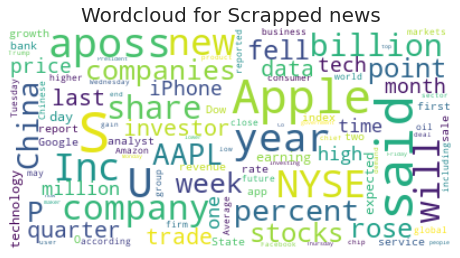

In [47]:
stopWords = set(STOPWORDS)
stopWords.update(['stock', "market", "NASDAQ", 'Reuters'])


wordcloud = WordCloud(stopwords=stopWords,max_font_size=50,max_words=100,collocations=False, background_color='white').generate(" ".join(text for text in articles_df['body_text']))
plt.figure(figsize=(8,8))
plt.title("Wordcloud for Scrapped news", fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()





As we can see from the wordclouds, there are some neutral words related to economy, and the majority of frequent words doesn't reflect any sentiment.

## Processing

### NLP processing

In [48]:
news=articles_df[['body_text','publish_date','title']]
# Number of mentions, hashtags, urls
cnt_1, cnt_2, cnt_3 = 0, 0, 0
max_len, min_len, mean_len = -float("inf"), float("inf"), 0
for row in news.values:
    text = row[0]  # 0 for text content
    if "@" in text:
        cnt_1 += 1
    if "#" in text:
        cnt_2 += 1
    if 'http' or 'www' in text:
        cnt_3 += 1
    if len(text) < min_len:
        min_len = len(text)
    if len(text) > max_len:
        max_len = len(text)

    mean_len += len(text)
    
mean_len /= len(articles_df)
    
print(f'Number of texts having mentions: {cnt_1}')
print(f'Number of texts having hashtags: {cnt_2}')
print(f'Number of texts having urls: {cnt_3}')
print(f'min_len:{min_len} max_len:{max_len} mean_len:{mean_len}')


Number of texts having mentions: 167
Number of texts having hashtags: 120
Number of texts having urls: 13845
min_len:0 max_len:45864 mean_len:2872.892163235825


In [49]:
from pickle import STOP
# Remove urls
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S_+', '', text)

# Remove mentions
def remove_usernames_ressource(text):
    text_split = text.split("-",1)
    if len(text_split)>1:
        text=text_split[1]
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)
    return text
# Remove hashtags
def remove_hashtags(text):
    return re.sub("#[A-Za-z0-9_]+"," ", text)

# Remove punctuations
punc_list = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc_list))

# Convert emojis to texts
def convert_emojis(text):
    return demojize(text).replace(":","")

# Apply the previous functions
def full_preprocessing(text):
    """
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove non-ascii words
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Replace '&amp;' with 'and'
    text = re.sub(r'&amp;', 'and', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    text = remove_urls(text)
    text = remove_usernames_ressource(text)
    text = remove_hashtags(text)
    text = remove_punctuation(text)
    text = convert_emojis(text)

    return text.lower()

# Trasform text to tokens (separated words)
def tokenize(text) :
    text = text.split()
    return text

# Remove stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    words_to_keep = ["not","no","nor"]
    stopword = [elem for elem in stop_words if not elem in words_to_keep]
    text = [w.lower() for w in text if not w.lower() in stopword]
    return text

# Lemmatization
wn = nltk.WordNetLemmatizer()
def lemmatize(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# Stemming
ps = nltk.PorterStemmer()
ls = nltk.LancasterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    text = [ls.stem(word) for word in text]
    return text



In [50]:
def full_processing(df):
    df["text_W_puncts"] =df["body_text"].apply(lambda x: full_preprocessing(x))
    df["text_tokenized"] = df["text_W_puncts"].apply(lambda x: tokenize(x))
    df["text_W_stopwords"] = df["text_tokenized"].apply(lambda x: remove_stopwords(x))
    df["text_lemmatized"] = df["text_W_stopwords"].apply(lambda x: lemmatize(x))
    df["text_stemmed"] = df["text_lemmatized"].apply(lambda x: stemming(x))
    df["text_processed"] = df["text_stemmed"].apply(lambda x: ' '.join(str(e) for e in x))
    
    return df
    

In [51]:
articles_processed = full_processing(articles_df)


In [52]:
articles_processed

,ticker,publish_date,title,body_text,url,text_W_puncts,text_tokenized,text_W_stopwords,text_lemmatized,text_stemmed,text_processed
0,Apple,"Jan 09, 2023 03:54PM ET",S&P 500 jumps as bets on less hawkish Fed fuel...,By Yasin Ebrahim Investing.com -- The S&P 500 ...,https://www.investing.com//news/stock-market-n...,the sp 500 gave up gains monday as value sect...,"[the, sp, 500, gave, up, gains, monday, as, va...","[sp, 500, gave, gains, monday, value, sectors,...","[sp, 500, gave, gain, monday, value, sector, m...","[sp, 500, gav, gain, monday, valu, sect, marke...",sp 500 gav gain monday valu sect market includ...
0,Apple,"Jan 09, 2023 02:48PM ET",Apple's VP services Stern to depart - Insider,(Reuters) - Apple Inc (NASDAQ:AAPL)'s vice pre...,https://www.investing.com//news/stock-market-n...,apple inc nasdaqaapls vice president of servi...,"[apple, inc, nasdaqaapls, vice, president, of,...","[apple, inc, nasdaqaapls, vice, president, ser...","[apple, inc, nasdaqaapls, vice, president, ser...","[appl, int, nasdaqaapl, vic, presid, serv, pet...",appl int nasdaqaapl vic presid serv pet stern ...
0,Apple,"Jan 09, 2023 02:18PM ET",Wall Street Counting on Big Tech Rip Once Fed ...,(Bloomberg) -- Wall Street tech bulls are coun...,https://www.investing.com//news/stock-market-n...,wall street tech bulls are counting on the in...,"[wall, street, tech, bulls, are, counting, on,...","[wall, street, tech, bulls, counting, industry...","[wall, street, tech, bull, counting, industry,...","[wal, street, tech, bul, count, industr, megac...",wal street tech bul count industr megacap stoc...
0,Apple,"Jan 09, 2023 11:21AM ET",U.S. Supreme Court lets Meta's WhatsApp pursue...,WASHINGTON (Reuters) -The U.S. Supreme Court o...,https://www.investing.com//news/stock-market-n...,the us supreme court on monday let meta platfo...,"[the, us, supreme, court, on, monday, let, met...","[us, supreme, court, monday, let, meta, platfo...","[u, supreme, court, monday, let, meta, platfor...","[u, suprem, court, monday, let, met, platform,...",u suprem court monday let met platform int nas...
0,Apple,"Jan 08, 2023 04:00AM ET",Protesters clash with police at COVID antigen ...,SHANGHAI (Reuters) - Protesters clashed with p...,https://www.investing.com//news/coronavirus/pr...,protesters clashed with police in central chi...,"[protesters, clashed, with, police, in, centra...","[protesters, clashed, police, central, china, ...","[protester, clashed, police, central, china, d...","[protest, clash, pol, cent, chin, demonst, sat...",protest clash pol cent chin demonst saturday h...
...,...,...,...,...,...,...,...,...,...,...,...
0,Apple,"Mar 05, 2014 10:45AM ET",Facebook Is Worth More Than Its Weight In Gold...,By Nat Rudarakanchana - This chart throws inve...,https://www.investing.com//news/stock-market-n...,this chart throws investor sentiment behind t...,"[this, chart, throws, investor, sentiment, beh...","[chart, throws, investor, sentiment, behind, t...","[chart, throw, investor, sentiment, behind, te...","[chart, throw, invest, senty, behind, tech, go...",chart throw invest senty behind tech gold min ...
0,Apple,"Feb 21, 2014 04:25AM ET","US, Australia To Sign Tax Evasion Agreement",By Sneha Shankar - U.S. and Australia are plan...,https://www.investing.com//news/economy-news/u...,us and australia are planning to sign an agre...,"[us, and, australia, are, planning, to, sign, ...","[us, australia, planning, sign, agreement, bat...","[u, australia, planning, sign, agreement, batt...","[u, austral, plan, sign, agr, battl, tax, eva,...",u austral plan sign agr battl tax eva prev com...
0,Apple,"Feb 11, 2014 12:25PM ET",Are European Corporate Tax Havens Benefiting F...,"By Angelo Young - For much of the past year, E...",https://www.investing.com//news/stock-market-n...,for much of the past year european officials ...,"[for, much, of, the, past, year, european, off...","[much, past, year, european, officials, callin...","[much, past, year, european, official, calling...",

## Feature extraction (Maybe needed for Fine Bert)

### Bag Of Words

In [53]:
count_Vect = CountVectorizer(ngram_range=(1,2)) # Bag Of Words
articles_countV = count_Vect.fit_transform(articles_processed.text_processed) # Fit the dictionnary
## A random set of words in our vocabulary
np.random.choice(count_Vect.get_feature_names(), 10, replace=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



array(['low 2956', 'tax 396', 'kong not', 'heartst', 'sint drag',
       'routin field', 'stead narrow', 'weak expect', 'might fin',
       'kingdom cut'], dtype='<U219')

### TF-IDF

In [54]:
tfidfV = TfidfVectorizer(ngram_range=(1,2))
train_tfidf = tfidfV.fit_transform(articles_processed.text_processed)

# Vader Scores

In [55]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# init the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def predicted_label(x):
  if x<=-0.5:
    return 0
  elif x>=0.5:
    return 2
  else:
    return 1

def score_Vader(df,analyzer):
  df['neg'] = df['text_processed'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
  df['neu'] = df['text_processed'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
  df['pos'] = df['text_processed'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
  df['compound'] = df['text_processed'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
  
  df['predicted_class'] = df['compound'].map(predicted_label) 
  return df

In [56]:
articles_df=score_Vader(articles_df, analyzer)

In [57]:
articles_df

,ticker,publish_date,title,body_text,url,text_W_puncts,text_tokenized,text_W_stopwords,text_lemmatized,text_stemmed,text_processed,neg,neu,pos,compound,predicted_class
0,Apple,"Jan 09, 2023 03:54PM ET",S&P 500 jumps as bets on less hawkish Fed fuel...,By Yasin Ebrahim Investing.com -- The S&P 500 ...,https://www.investing.com//news/stock-market-n...,the sp 500 gave up gains monday as value sect...,"[the, sp, 500, gave, up, gains, monday, as, va...","[sp, 500, gave, gains, monday, value, sectors,...","[sp, 500, gave, gain, monday, value, sector, m...","[sp, 500, gav, gain, monday, valu, sect, marke...",sp 500 gav gain monday valu sect market includ...,0.089,0.811,0.100,0.6597,2
0,Apple,"Jan 09, 2023 02:48PM ET",Apple's VP services Stern to depart - Insider,(Reuters) - Apple Inc (NASDAQ:AAPL)'s vice pre...,https://www.investing.com//news/stock-market-n...,apple inc nasdaqaapls vice president of servi...,"[apple, inc, nasdaqaapls, vice, president, of,...","[apple, inc, nasdaqaapls, vice, president, ser...","[apple, inc, nasdaqaapls, vice, president, ser...","[appl, int, nasdaqaapl, vic, presid, serv, pet...",appl int nasdaqaapl vic presid serv pet stern ...,0.014,0.938,0.047,0.5106,2
0,Apple,"Jan 09, 2023 02:18PM ET",Wall Street Counting on Big Tech Rip Once Fed ...,(Bloomberg) -- Wall Street tech bulls are coun...,https://www.investing.com//news/stock-market-n...,wall street tech bulls are counting on the in...,"[wall, street, tech, bulls, are, counting, on,...","[wall, street, tech, bulls, counting, industry...","[wall, street, tech, bull, counting, industry,...","[wal, street, tech, bul, count, industr, megac...",wal street tech bul count industr megacap stoc...,0.049,0.878,0.073,0.9412,2
0,Apple,"Jan 09, 2023 11:21AM ET",U.S. Supreme Court lets Meta's WhatsApp pursue...,WASHINGTON (Reuters) -The U.S. Supreme Court o...,https://www.investing.com//news/stock-market-n...,the us supreme court on monday let meta platfo...,"[the, us, supreme, court, on, monday, let, met...","[us, supreme, court, monday, let, meta, platfo...","[u, supreme, court, monday, let, meta, platfor...","[u, suprem, court, monday, let, met, platform,...",u suprem court monday let met platform int nas...,0.059,0.883,0.058,0.3612,1
0,Apple,"Jan 08, 2023 04:00AM ET",Protesters clash with police at COVID antigen ...,SHANGHAI (Reuters) - Protesters clashed with p...,https://www.investing.com//news/coronavirus/pr...,protesters clashed with police in central chi...,"[protesters, clashed, with, police, in, centra...","[protesters, clashed, police, central, china, ...","[protester, clashed, police, central, china, d...","[protest, clash, pol, cent, chin, demonst, sat...",protest clash pol cent chin demonst saturday h...,0.146,0.815,0.040,-0.9240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Apple,"Mar 05, 2014 10:45AM ET",Facebook Is Worth More Than Its Weight In Gold...,By Nat Rudarakanchana - This chart throws inve...,https://www.investing.com//news/stock-market-n...,this chart throws investor sentiment behind t...,"[this, chart, throws, investor, sentiment, beh...","[chart, throws, investor, sentiment, behind, t...","[chart, throw, investor, sentiment, behind, te...","[chart, throw, invest, senty, behind, tech, go...",chart throw invest senty behind tech gold min ...,0.041,0.931,0.029,-0.5050,0
0,Apple,"Feb 21, 2014 04:25AM ET","US, Australia To Sign Tax Evasion Agreement",By Sneha Shankar - U.S. and Australia are plan...,https://www.investing.com//news/economy-news/u...,us and australia are planning to sign an agre...,"[us, and, australia, are, planning, to, sign, ...","[us, australia, planning, sign, agreement, bat...","[u, australia, planning, sign, agreement, batt...","[u, austral, plan, sign, agr, battl, tax, eva,...",u austral plan sign agr battl tax eva prev com...,0.000,0.949,0.051,0.7906,2
0,Apple,"Feb 11, 2014 12:25PM ET",Are European Corporate Tax Havens Benefiting F...,"By Angelo Young - For much of the past year, E...",https:/

In [58]:
articles_df.to_pickle("apple_news_sentiments.pkl")

# Hopsworks

In [59]:
!pip install hopsworks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 M

In [60]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

ImportError: ignored

In [ ]:
market_news_fg = fs.get_or_create_feature_group(
        name = 'market_news_fg',
        description = 'Market news for the three companies',
        version = 1,
        primary_key = ['publish_date','ticker'],
        online_enabled = True,
        event_time = 'publish_date'
    )    

market_news_fg.insert(articles_df)